In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling as pp 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_diabetes = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')

In [4]:
df=df_diabetes.copy()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Visualisation 

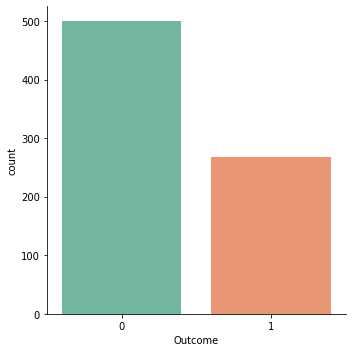

In [9]:
#The number of patients who has diabetes are lower than the others.
sns.catplot(x="Outcome",kind="count",data=df, palette="Set2")

In [10]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [11]:
#Mean of pregnancy amount of patients who has diabetes is 4.87
df.loc[(df["Outcome"]==1)]["Pregnancies"].mean()

4.865671641791045

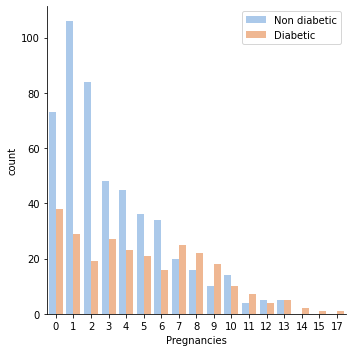

In [12]:

sns.catplot(x="Pregnancies", kind="count",hue="Outcome",data=df, palette="pastel", legend=False)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])

In [13]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

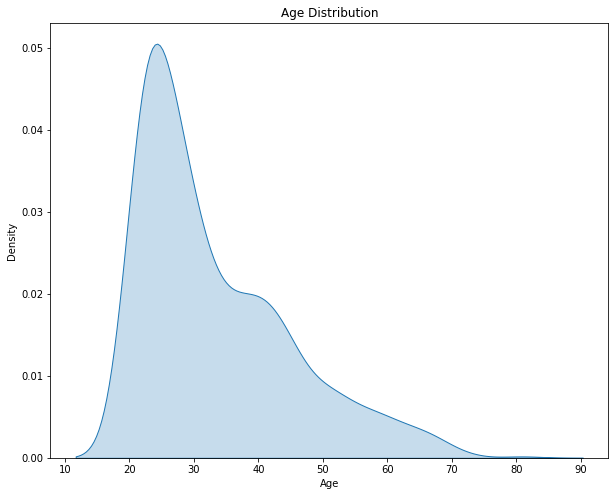

In [14]:
plt.figure(figsize=(10,8))
sns.kdeplot(df.Age,shade=True, palette="pastel").set_title("Age Distribution")

In [15]:
#Average age of patients who has diabetes is 37
df.loc[(df["Outcome"]==1)]["Age"].mean()


37.06716417910448

In [16]:
df.loc[(df["Outcome"]==0)]["Age"].mean()

31.19

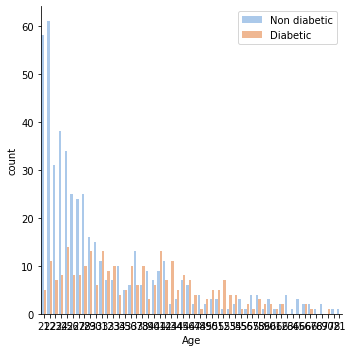

In [17]:
#Older ages are more tend to have diabetes than youngers
sns.catplot(x="Age", kind="count",hue="Outcome",data=df, palette="pastel", legend=False)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])

Text(0.5, 1.0, 'Age vs Being Diabetic')

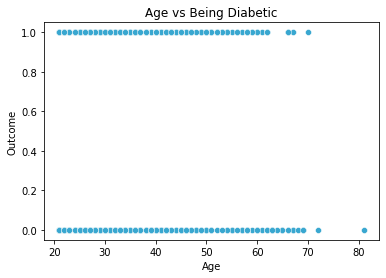

In [18]:
custom_palette = ['#39A7D0', '#36ADA4']
sns.set_palette(custom_palette)
sns.scatterplot(x="Age", y="Outcome", data=df).set_title("Age vs Being Diabetic")

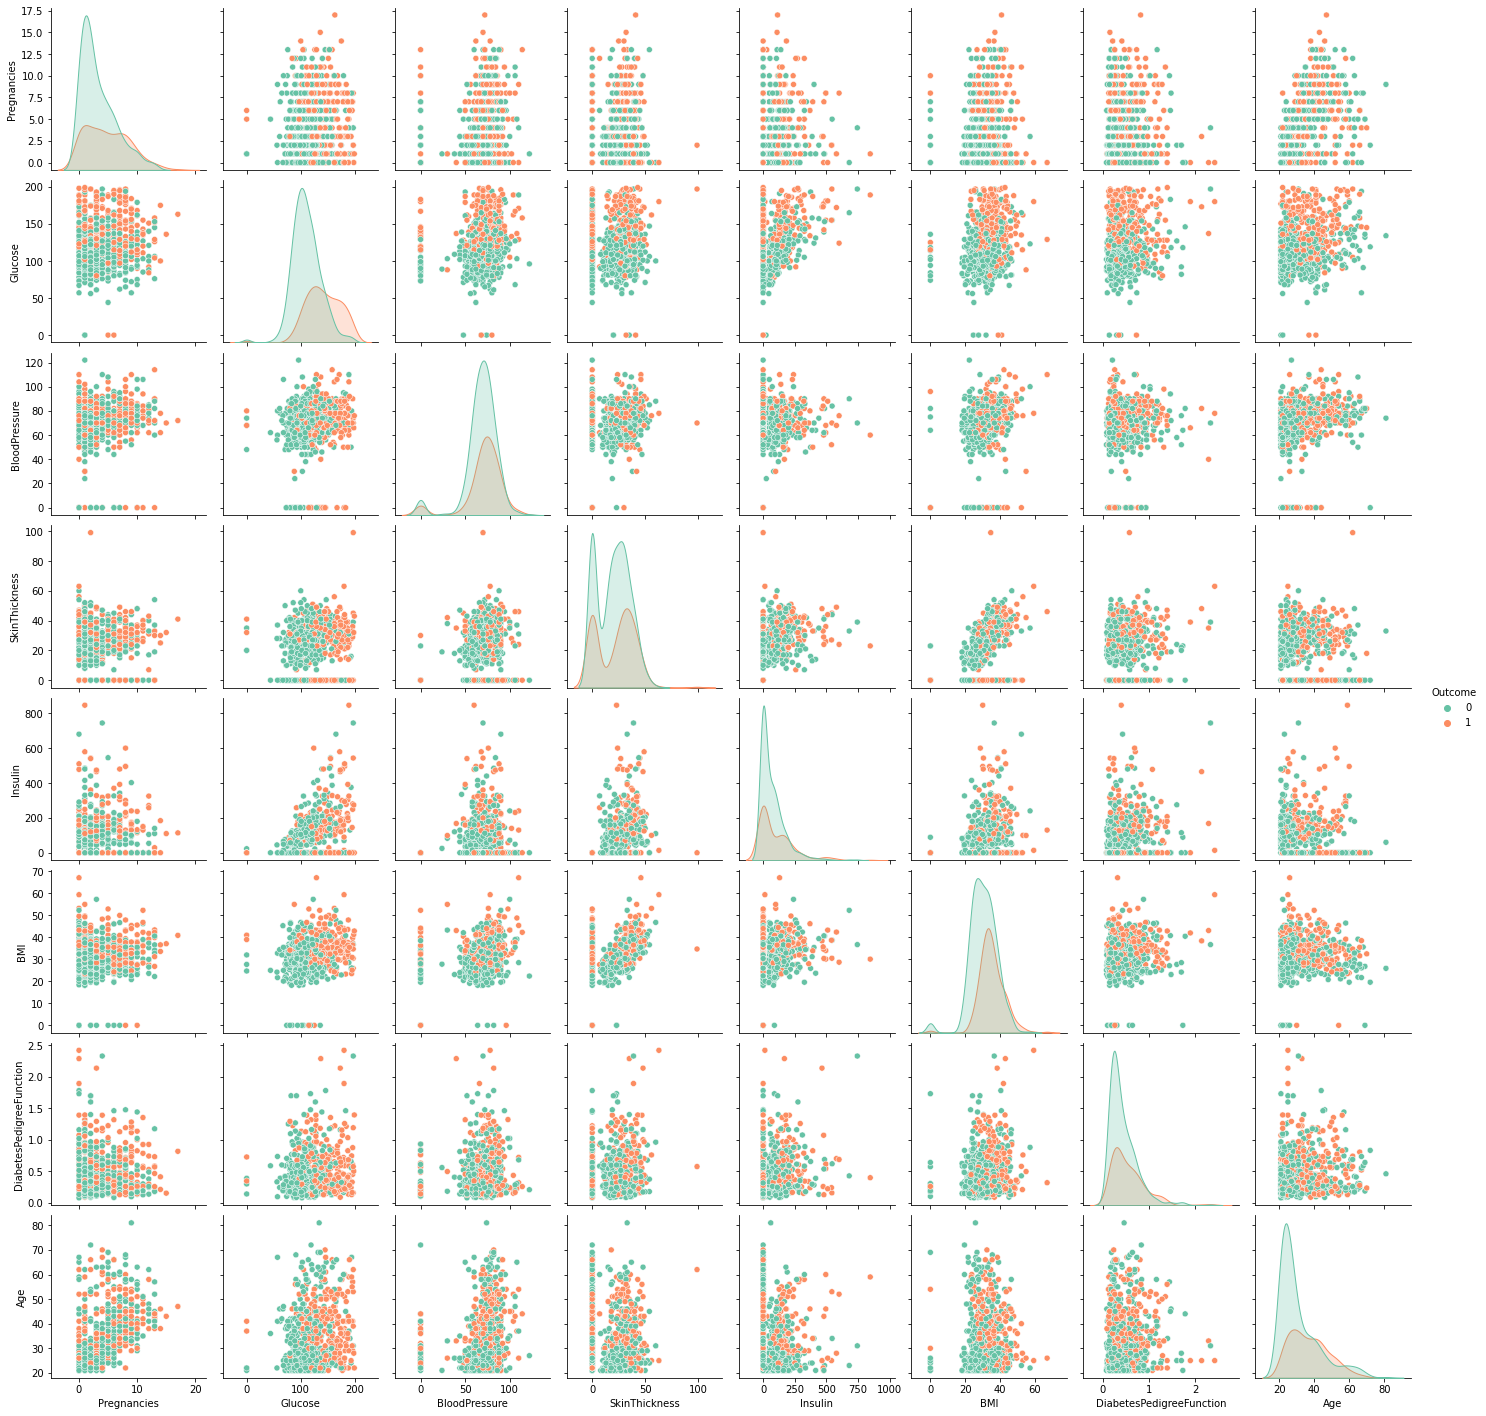

In [19]:
sns.pairplot(df, hue="Outcome", palette="Set2")

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

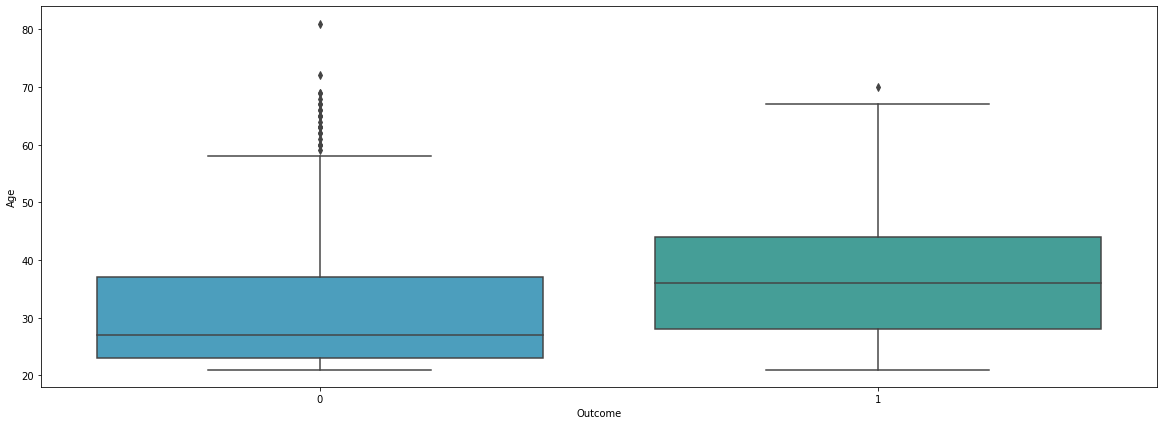

In [20]:
plt.figure(figsize=(20,7))
sns.boxplot(x="Outcome", y="Age", data=df)

# Regression Model

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

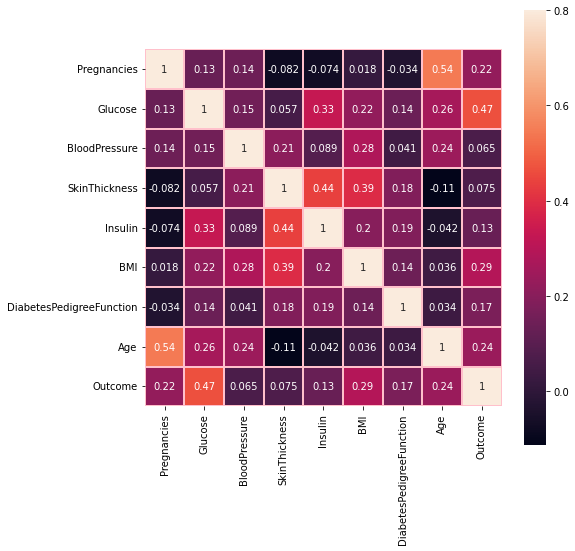

In [22]:
#Highest correlated factor for being diabetic is glucose
corr=df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, linewidths=0.05,square=True,annot=True,linecolor="pink")

In [23]:
from sklearn.model_selection import train_test_split

y=df["Outcome"] #dependent variable
X=df.drop(["Outcome"],axis=1) #independent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

lr = LogisticRegression(solver='liblinear') #solve=liblinear kaggle için gerekli
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [26]:
x_pred=lr.predict(X_train)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_train, x_pred)

array([[317,  32],
       [ 85, 103]])

In [28]:
#train score
score = accuracy_score(y_train, x_pred)
score

0.7821229050279329

In [29]:
y_pred = lr.predict(X_test)

In [30]:
confusion_matrix(y_pred,y_test)

array([[126,  32],
       [ 25,  48]])

In [31]:
#test score 
score = accuracy_score(y_pred, y_test)
score

0.7532467532467533

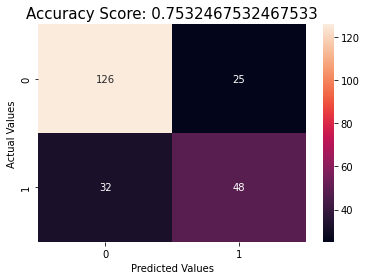

In [32]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



# Comments About The Analysis

In [34]:
#Overall accuracy score is %75
#Non-diabetics prediction success is higher (%83)

In [35]:
#eğer data setim küçükse 80'e 20 gibi bölmektende 70'e 30 gibi bölmek daha doğru olur